In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
# Load the dataset
df = pd.read_csv("SriLanka_Weather_Dataset.csv")

In [3]:
# Convert 'time' column to datetime format
df['time'] = pd.to_datetime(df['time'])

In [4]:
# Set 'time' as the index
df.set_index('time', inplace=True)

In [5]:
# Drop unnecessary columns
df.drop(['latitude', 'longitude', 'elevation', 'country', 'city', 'sunrise', 'sunset'], axis=1, inplace=True)

In [6]:
# Check for missing values
df.fillna(method='ffill', inplace=True)

/var/folders/j8/0qcqrhnn3h11_ddm2ccxxpzh0000gn/T/ipykernel_14251/3667130651.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


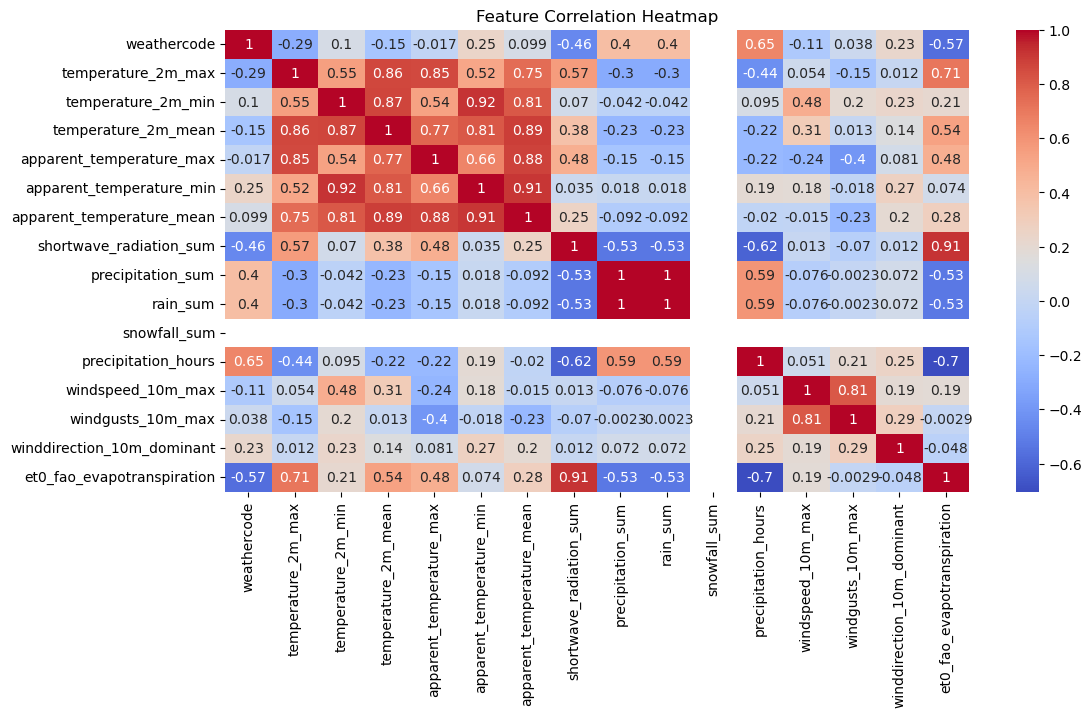

In [7]:
# EDA - Visualization
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

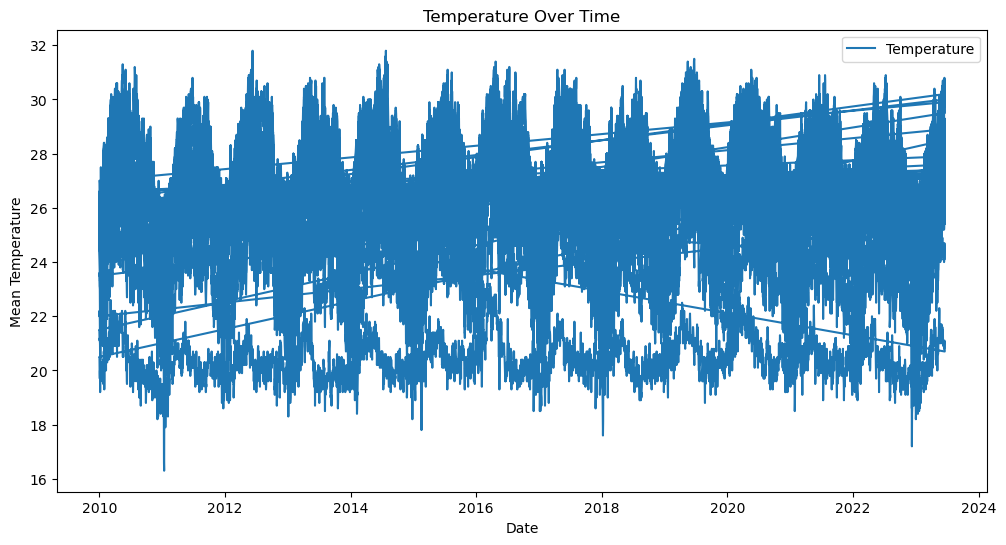

In [8]:
# Time Series Analysis
plt.figure(figsize=(12,6))
plt.plot(df.index, df['temperature_2m_mean'], label='Temperature')
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.title("Temperature Over Time")
plt.legend()
plt.show()


In [9]:
# Splitting Data
X = df.drop(columns=['temperature_2m_mean'])
y = df['temperature_2m_mean']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Scaling Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Model Training & Evaluation
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(kernel='rbf')
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"{name}: MSE = {mse:.2f}, R2 = {r2:.2f}")

Linear Regression: MSE = 0.02, R2 = 0.99
Random Forest: MSE = 0.02, R2 = 0.99
SVR: MSE = 0.01, R2 = 1.00


In [12]:
# Hyperparameter Tuning for Random Forest
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
gs = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
gs.fit(X_train_scaled, y_train)
best_model = gs.best_estimator_
print("Best Random Forest Model:", gs.best_params_)

Best Random Forest Model: {'max_depth': None, 'n_estimators': 200}


In [13]:
# Making a Single Prediction
sample = np.array(X_test.iloc[0]).reshape(1, -1)
sample_scaled = scaler.transform(sample)
print("Prediction:", best_model.predict(sample_scaled))

Prediction: [22.359]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


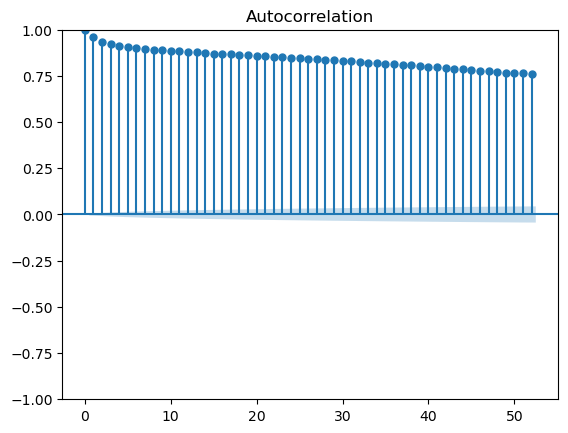

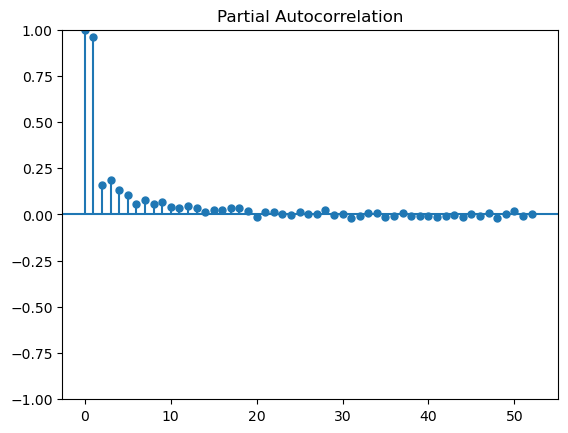

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/

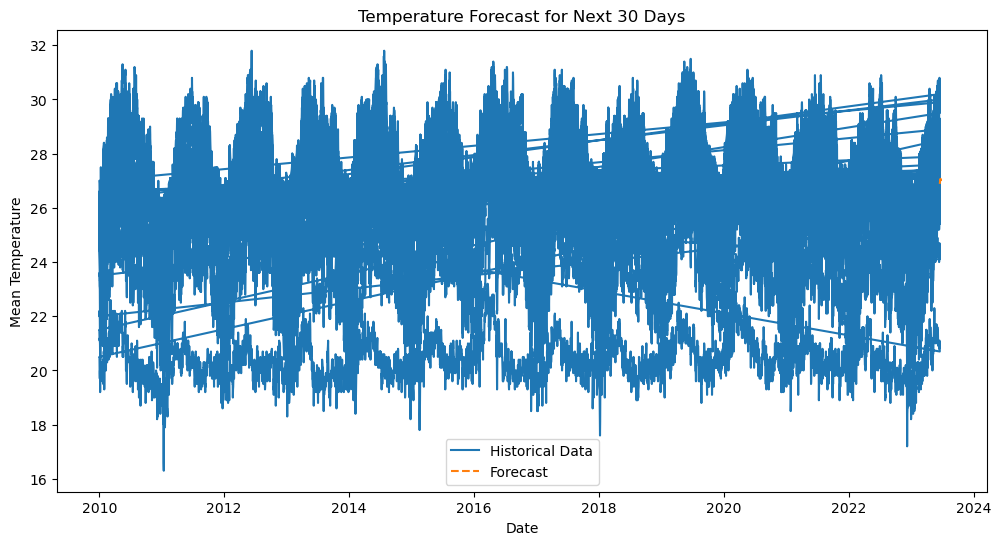

In [14]:
# Forecasting Model with ARIMA
plot_acf(df['temperature_2m_mean'])
plot_pacf(df['temperature_2m_mean'])
plt.show()

arima_model = ARIMA(df['temperature_2m_mean'], order=(5,1,0))
model_fit = arima_model.fit()
forecast = model_fit.forecast(steps=30)

plt.figure(figsize=(12,6))
plt.plot(df.index, df['temperature_2m_mean'], label='Historical Data')
plt.plot(pd.date_range(df.index[-1], periods=30, freq='D'), forecast, label='Forecast', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.title("Temperature Forecast for Next 30 Days")
plt.show()


In [16]:
# Save the model and scaler
import joblib

joblib.dump(model, "weather_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully!")

Model and scaler saved successfully!
